In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading Banking dataset
bank_df = pd.read_csv("Banking Dataset\\train.csv",index_col=False)

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### We need to convert the object data type to categorical data type!

In [6]:
cols_to_category = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "poutcome",
]
bank_df[cols_to_category] = bank_df[cols_to_category].astype("category")

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  object  
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


In [8]:
#Converting the target variable to (0="No" & 1="Yes")

bank_df['y'] = np.where(bank_df['y']=='no',0,1)

In [9]:
bank_df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [10]:
bank_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

### Basic Visualizations

In [11]:
import seaborn as sns

<Axes: xlabel='y', ylabel='count'>

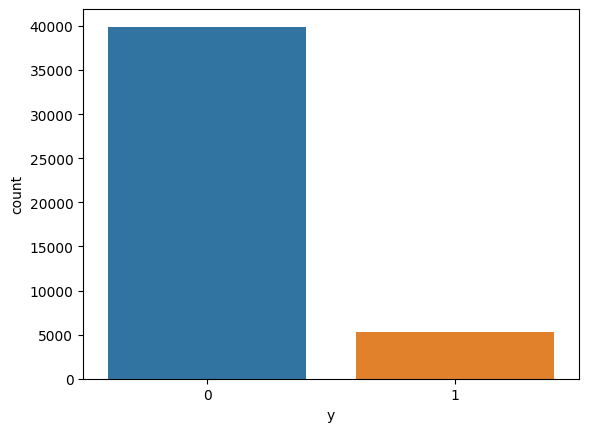

In [12]:
sns.countplot(data=bank_df,x='y')

In [13]:
#class Imbalance

bank_df.groupby(['y']).size()

y
0    39922
1     5289
dtype: int64

#### Highly Imbalanced classes

<Axes: xlabel='default', ylabel='count'>

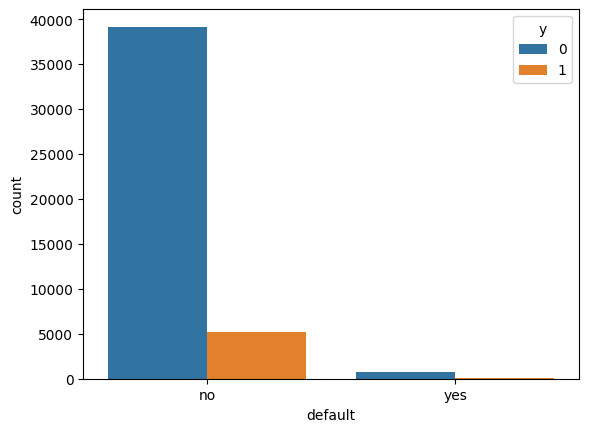

In [14]:
# defaults 
sns.countplot(bank_df,x='default',hue='y')

<Axes: >

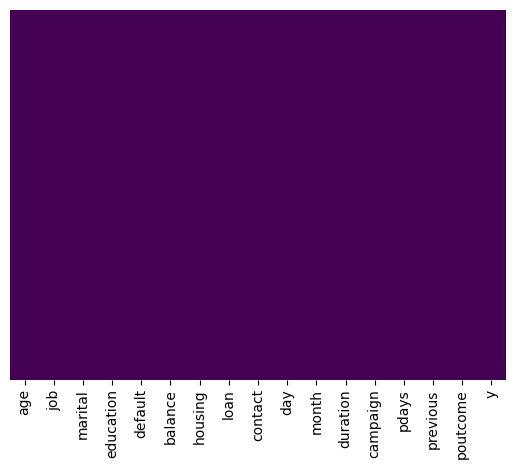

In [15]:
# Checking for missing data

sns.heatmap(bank_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

<Axes: xlabel='age', ylabel='Count'>

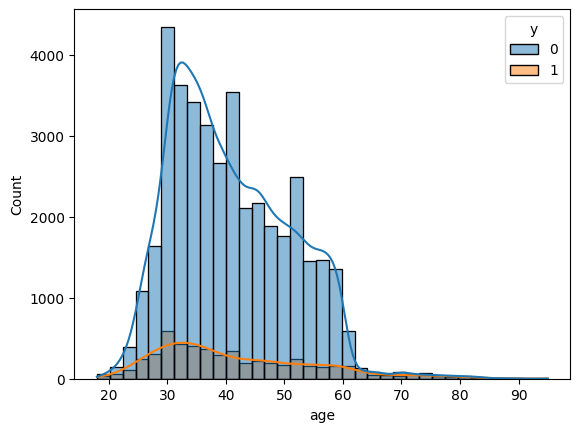

In [16]:
#Performing EDA

sns.histplot(bank_df,x='age',bins=35,color='skyblue',kde=True,hue='y')

#### We will now define subsciption rate which will tell us the distribution of different categorical features where y valus is 1 

In [17]:
#Generalized code for all categorical variable

# Calculate subscription rate for each categorical variable
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

subscription_rates = {}

for col in categorical_columns:
    
    subscription_rates[col] = bank_df.groupby(col)['y'].apply(lambda x: (x == 1).mean())

In [18]:
subscription_rates.keys()

dict_keys(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [19]:
subscription_rates['job']

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

#### The above data tells us that out of 100 data points where y is 1, 28 of them are students

<Axes: xlabel='job'>

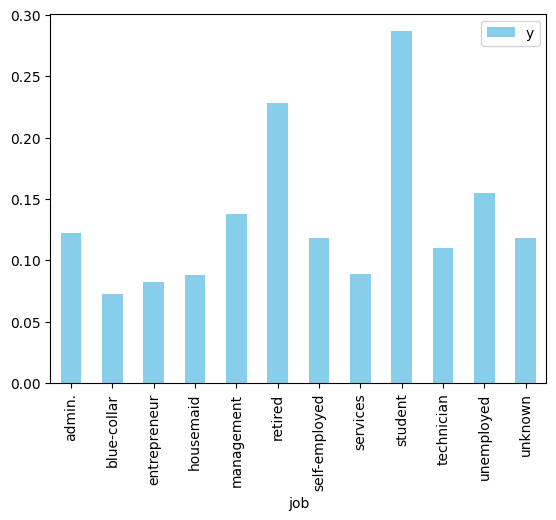

In [20]:
# Plotting a bar plot for one categorical column

temp=subscription_rates['job']

pd.DataFrame.from_dict(temp).plot(kind='bar',color='skyblue')

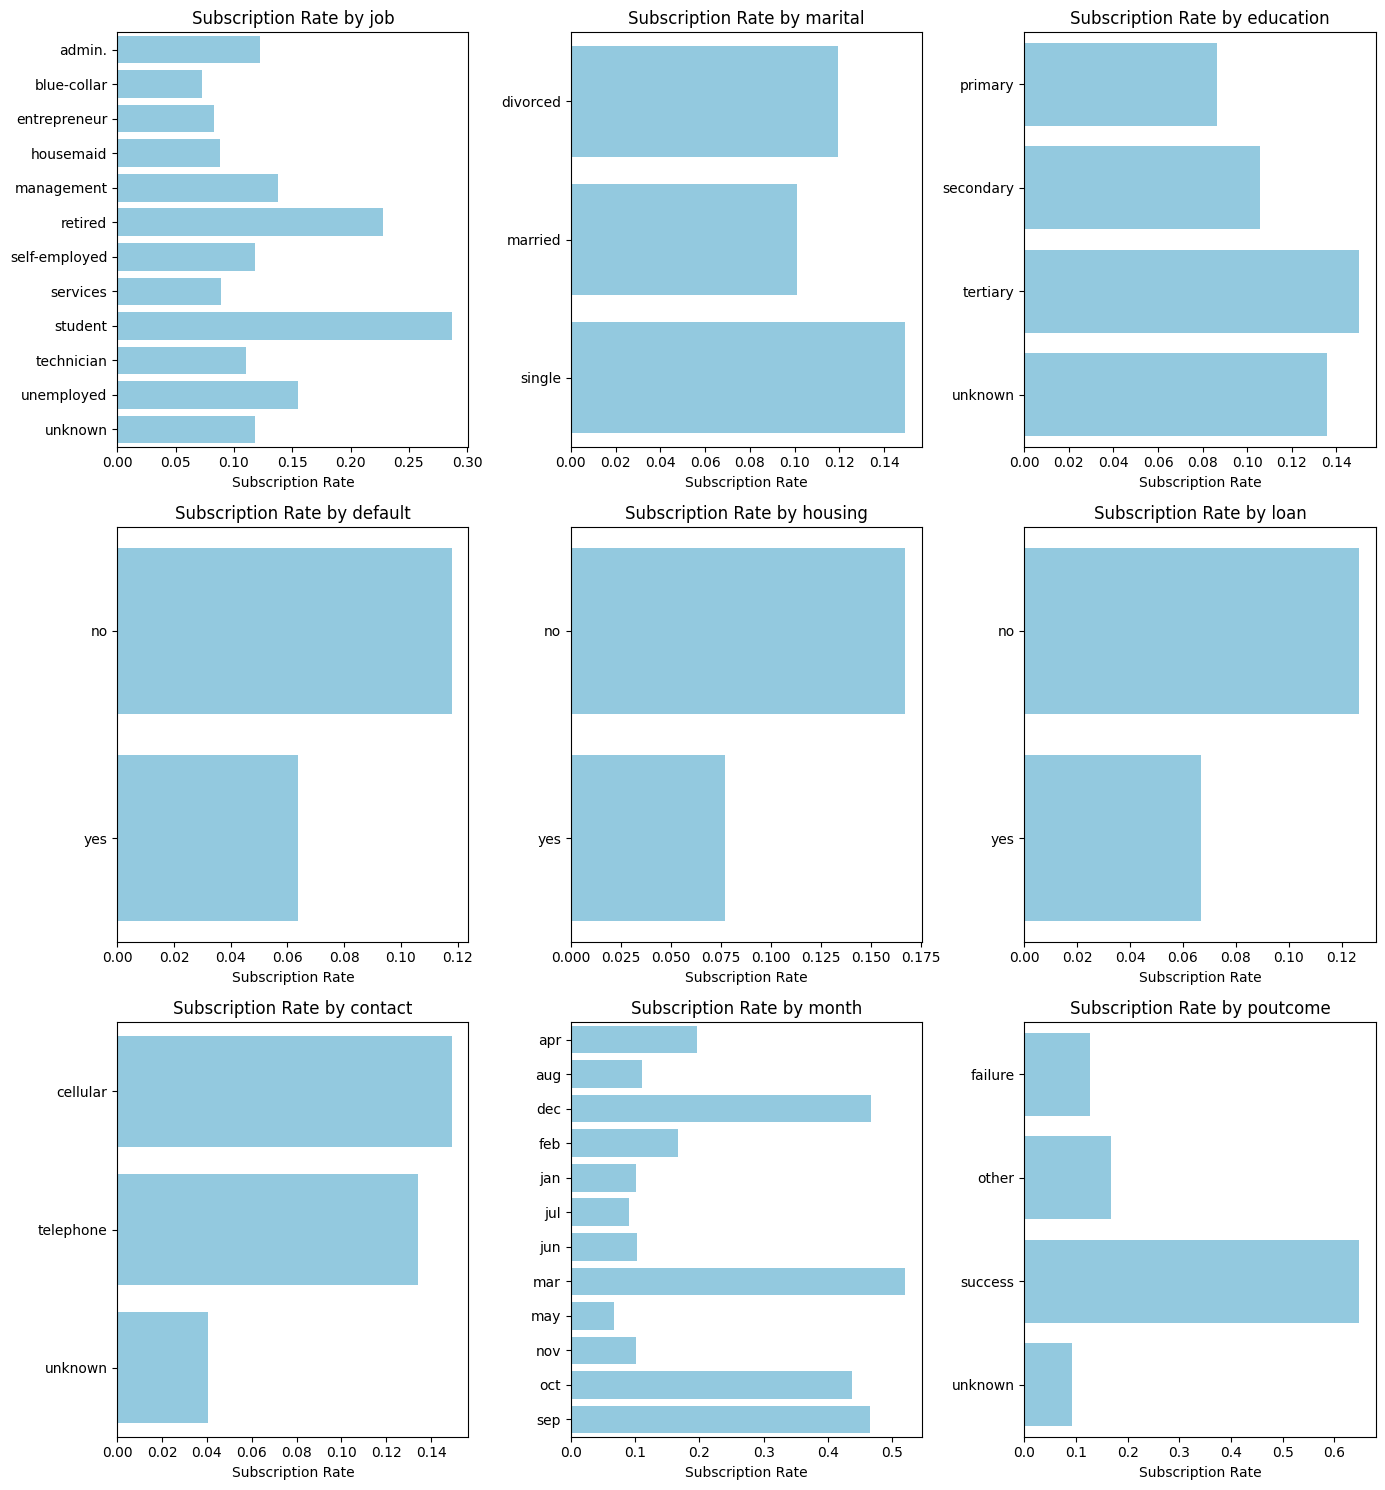

In [21]:
#Plotting different subsciption rates

plt.figure(figsize=(14, 15))

for idx, col in enumerate(categorical_columns, 1):
    ax = plt.subplot(3, 3, idx)  # Get the current axis
    temp = subscription_rates[col].items()
    categories, rates = zip(*temp)  # Unpack the dictionary items
    sns.barplot(x=list(rates), y=list(categories), color='skyblue', ax=ax)
    ax.set_title(f'Subscription Rate by {col}')
    ax.set_xlabel('Subscription Rate')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

<Axes: >

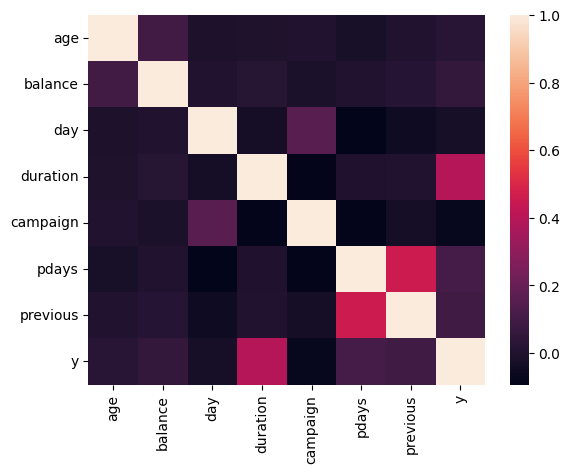

In [22]:
# Correlation between numerical variables 

sns.heatmap(bank_df.corr(numeric_only=True))

In [23]:
bank_df.corr('pearson',numeric_only=True).style.background_gradient(axis=None)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<Axes: xlabel='campaign', ylabel='balance'>

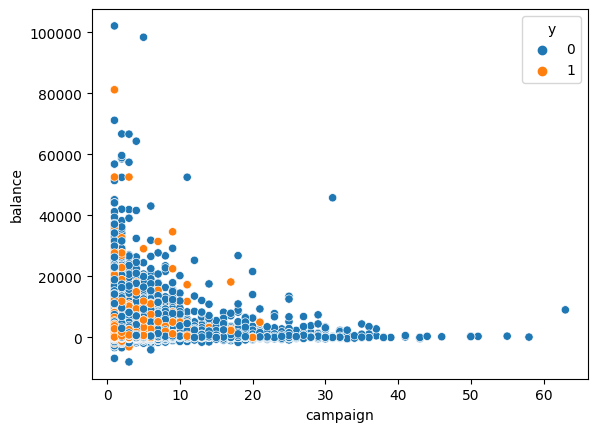

In [24]:
sns.scatterplot(bank_df,x='campaign',y='balance',hue='y',)

#### One Hot Encoding

In [25]:
# Redefine the list of categorical columns excluding the target variable 'y'
# Not including education as it is an ordinal type of data

categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Perform one-hot encoding on the categorical columns
data_pre = pd.get_dummies(bank_df, columns=categorical_columns, drop_first=True,dtype=int)

# Separate the features (X) from the target variable (y)
X = data_pre.drop('y', axis=1)
y = data_pre['y']

# Display the first few rows of the encoded features
X.head()


,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,2143,5,261,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,secondary,29,5,151,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,secondary,2,5,76,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,unknown,1506,5,92,1,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,unknown,1,5,198,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
# Libraries for Ordinal Encoding 

from sklearn.preprocessing import OrdinalEncoder

#### Ordinal Variables comprises a finite set of discrete values with a ranked ordering between values.

In [27]:
ord_encoder = OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']])
X['education'] = ord_encoder.fit_transform(X[['education']])

In [28]:
#Encoded Values
X['education'].value_counts(normalize=True)

education
2.0    0.513194
3.0    0.294198
1.0    0.151534
0.0    0.041074
Name: proportion, dtype: float64

In [29]:
X.shape

(45211, 40)

In [30]:
y.shape

(45211,)

In [31]:
rf_seed = 345
np.random.seed(rf_seed)

#### Splitting the training data

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    fbeta_score,
    make_scorer,
    recall_score,
)

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify= y, random_state=rf_seed)

In [34]:
rf2 = RandomForestClassifier(
    n_jobs=-1, random_state=rf_seed, class_weight="balanced_subsample"
)

In [35]:
rs = make_scorer(recall_score)

In [48]:
cv = cross_val_score(rf2, X, y, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.00378072 0.         0.01512287 0.05860113 0.03780718 0.08695652
 0.19848771 0.08506616 0.34215501 0.83742911]
0.17 recall with a standard deviation of 0.25


In [37]:
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=345)

In [38]:
pred_rf = rf2.predict(X_test)

In [39]:
# Evaluate the model's performance

rf_accuracy = accuracy_score(y_test,pred_rf)
rf_classification_report = classification_report(y_test, pred_rf)

print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     13175
           1       0.68      0.31      0.42      1745

    accuracy                           0.90     14920
   macro avg       0.80      0.64      0.69     14920
weighted avg       0.89      0.90      0.89     14920



As we can see in the above result accuracy is 90% but the recall for minority class is only 31%. This is due to highly imbalanced class. We need to impelement the oversampling technique and then train our model.

#### If we need to trade off between Precision and Recall as per the problem statement we need a better recall(that is to penalize False Negatives)

### Oversampling Techniques

In [42]:
from imblearn.over_sampling import SMOTE, ADASYN

In [44]:
smote= SMOTE(random_state=42)
ada= ADASYN(random_state=42)

In [45]:
X_train_sme, y_train_sme = smote.fit_resample(X_train,y_train)
X_train_ada, y_train_ada= ada.fit_resample(X_train,y_train)

In [46]:
rf_sme = RandomForestClassifier(n_jobs=-1,random_state=rf_seed)

In [49]:
cv_sme = cross_val_score(rf_sme, X_train_sme, y_train_sme, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv_sme))
print("%0.2f recall with a standard deviation of %0.2f" % (cv_sme.mean(), cv_sme.std()))

Cross validation scores: [0.33495327 0.84074766 0.99850467 0.99775701 0.99513837 0.9973822
 0.9973822  0.99439252 0.99551402 0.99514019]
0.91 recall with a standard deviation of 0.20


In [50]:
rf_sme.fit(X_train_sme,y_train_sme)
pred_rf_sme = rf_sme.predict(X_test)

In [51]:
# Evaluate the model's performance

rf_sme_accuracy = accuracy_score(y_test,pred_rf_sme)
rf_sme_classification_report = classification_report(y_test, pred_rf_sme)

print(rf_sme_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     13175
           1       0.61      0.48      0.54      1745

    accuracy                           0.90     14920
   macro avg       0.77      0.72      0.74     14920
weighted avg       0.90      0.90      0.90     14920



In [52]:
rf_ada = RandomForestClassifier(n_jobs=-1,random_state=rf_seed)
cv_ada = cross_val_score(rf_ada, X_train_ada, y_train_ada, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv_ada))
print("%0.2f recall with a standard deviation of %0.2f" % (cv_ada.mean(), cv_ada.std()))

Cross validation scores: [0.29597388 0.85273848 0.98657962 0.99310595 0.99092888 0.99419448
 0.99201742 0.99129489 0.99056946 0.98512876]
0.91 recall with a standard deviation of 0.21


In [54]:
rf_ada.fit(X_train_ada,y_train_ada)
pred_rf_ada = rf_ada.predict(X_test)
rf_ada_accuracy = accuracy_score(y_test,pred_rf_ada)
rf_ada_classification_report = classification_report(y_test, pred_rf_ada)

print(rf_ada_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     13175
           1       0.60      0.47      0.53      1745

    accuracy                           0.90     14920
   macro avg       0.77      0.72      0.74     14920
weighted avg       0.89      0.90      0.90     14920



In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
#Trying Logistic Regression

LR_ada = LogisticRegression(solver='liblinear')
LR_ada.fit(X_train_ada,y_train_ada)
pred_LR_ada = LR_ada.predict(X_test)

LR_ada_accuracy = accuracy_score(y_test,pred_LR_ada)
LR_ada_classification_report = classification_report(y_test, pred_LR_ada)

print(LR_ada_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     13175
           1       0.48      0.47      0.48      1745

    accuracy                           0.88     14920
   macro avg       0.71      0.70      0.70     14920
weighted avg       0.88      0.88      0.88     14920



In [58]:
# A function to help with hyperparameter tuning and giving the model with best Recall

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Define the models and their respective parameter grids
models_param_grid = {
    KNeighborsClassifier(): {
        'n_neighbors': [7,9,11,13,17,19],
        'weights': ['uniform','distance'] 
    },
    RandomForestClassifier(random_state=42): {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 15, 20],
        'class_weight': ['balanced', 'balanced_subsample']
    },
    DecisionTreeClassifier(random_state=42): {
        'max_depth': [None, 10, 20],
        'criterion' :['gini', 'entropy'],
        'min_samples_split': [2, 5, 10],
        'class_weight': ['balanced']
    },
    LogisticRegression(max_iter=300, random_state=42): {
        'solver': ['liblinear', 'lbfgs'],
        'class_weight': ['balanced']
    }
}

# Scoring method is already defined as "rs"

# Results dictionary to store the best model and score
best_model, best_score, best_params = None, 0, None

# Grid search for each model
for model, params in models_param_grid.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring=rs, n_jobs=-1)
    grid_search.fit(X_train_ada, y_train_ada)
    
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = model.__class__.__name__
        best_params = grid_search.best_params_

# Print the best model and its score
print(f"Best Model: {best_model}")
print(f"Best Recall Score: {best_score}")
print(f"Best Parameters: {best_params}")


C:\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.91761634        nan 0.9163468         nan 0.91340838
        nan 0.91079653        nan 0.90600799        nan 0.90335981]
  warnings.warn(


Best Model: KNeighborsClassifier
Best Recall Score: 0.9176163427085425
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}


C:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From all the models above, the model with best recall is KNN for ADASYN, let's try to predict the test data

In [60]:
#Trying the best model 

knn_ada=KNeighborsClassifier(n_neighbors=7,weights='distance')

In [62]:
knn_ada.fit(X_train_ada,y_train_ada)
pred_knn_ada = knn_ada.predict(X_test)
knn_ada_accuracy = accuracy_score(y_test,pred_knn_ada)
knn_ada_classification_report = classification_report(y_test, pred_knn_ada)

print(knn_ada_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85     13175
           1       0.27      0.64      0.38      1745

    accuracy                           0.75     14920
   macro avg       0.60      0.70      0.61     14920
weighted avg       0.86      0.75      0.79     14920



As we can see there is a significant improvement on Recall but at the cost of accuracy which was expected due to the higher number of false positivies.

In [64]:
# Let's try Decision Tree Model on the SMOTE data

param_grid = {'min_samples_leaf': [2, 5, 7, 10],
              'min_samples_split': [2, 5, 10, 20],
              'max_depth' : [5, 7, 9, None],
              'criterion' :['gini', 'entropy']
             }

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=5,scoring='recall',n_jobs=-1,verbose=2)

gs_dt.fit(X_train_sme,y_train_sme)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, None],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='recall', verbose=2)

In [65]:
gs_dt.best_score_

0.9110517294699157

In [66]:
gs_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [67]:
pred_gs_dt_sme= gs_dt.predict(X_test)

dt_sme_classification_report=classification_report(y_test, pred_gs_dt_sme)

print(dt_sme_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     13175
           1       0.47      0.68      0.56      1745

    accuracy                           0.87     14920
   macro avg       0.71      0.79      0.74     14920
weighted avg       0.90      0.87      0.88     14920



This is a better model as the recall is significant higher and the accuracy & precision is not that badly impacted

#### Comments :

1) There is a significant improvement in Recall after we used oversampling methods to train the model. Especially in the Decision Tree model where recall is 68% and overall accuracy as 87%.